In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

pd.pandas.set_option("display.max_columns", None)

In [3]:
dataset = pd.read_csv("Classified Data.txt")
dataset.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [6]:
dataset = dataset.drop(["Unnamed: 0"], axis = 1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(dataset.iloc[:, :-1])

StandardScaler()

In [10]:
dataset.iloc[:, :-1] = pd.DataFrame(scalar.transform(dataset.iloc[:, :-1]))

In [11]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,0
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,0
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1


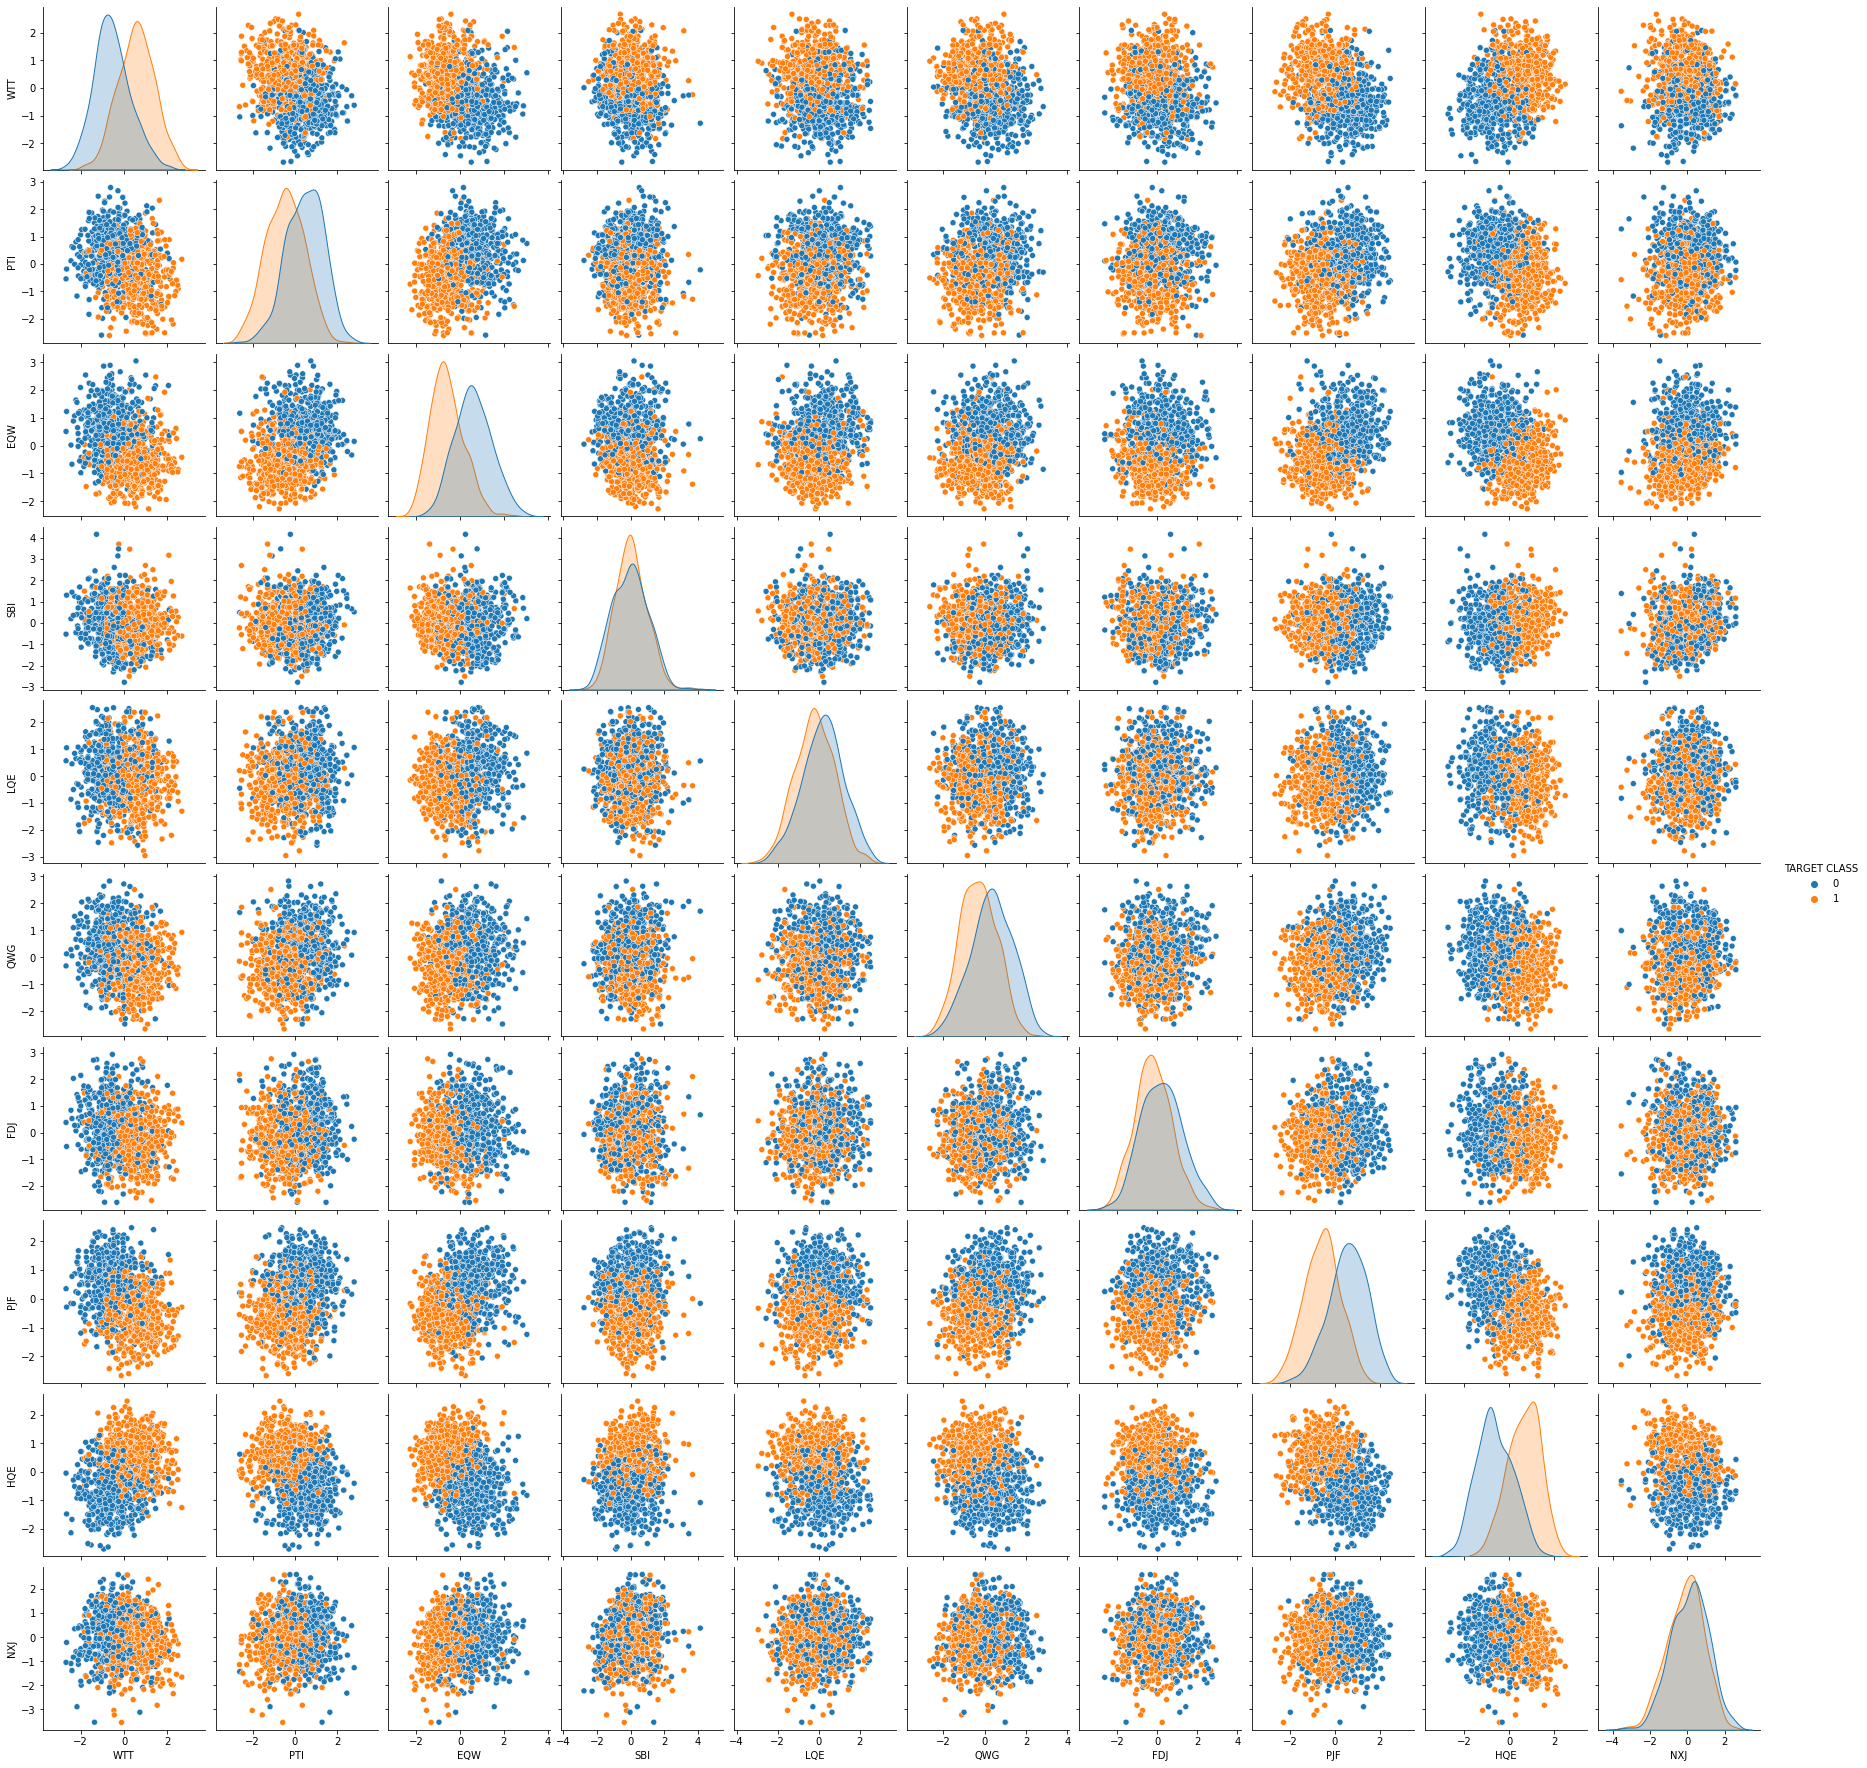

In [12]:
import seaborn as sns
# below line will take around 2 minute to get executed

sns.pairplot(dataset, hue = "TARGET CLASS")

In [14]:
# splitting the data into train-test dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset["TARGET CLASS"], test_size = 0.2, random_state = 1)

In [22]:
# choosing the k-value for the knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error_rate = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, dataset.iloc[:, :-1], dataset["TARGET CLASS"], cv = 10)
    error_rate.append(1-score.mean())

error_rate

[0.08900000000000008,
 0.09099999999999997,
 0.07199999999999984,
 0.06600000000000006,
 0.07100000000000006,
 0.07099999999999995,
 0.06899999999999973,
 0.06599999999999984,
 0.07100000000000006,
 0.06499999999999984,
 0.06700000000000017,
 0.06499999999999984,
 0.06299999999999994,
 0.05899999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.06500000000000006,
 0.06399999999999983,
 0.06399999999999983,
 0.06399999999999983,
 0.06600000000000006,
 0.06400000000000006,
 0.06999999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06299999999999994,
 0.061999999999999944,
 0.062000000000000055,
 0.06299999999999994,
 0.06099999999999994,
 0.06399999999999983,
 0.05700000000000005,
 0.06299999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.05999999999999994,
 0.06300000000000006,
 0.05700000000000005,
 0.05899999999999994]

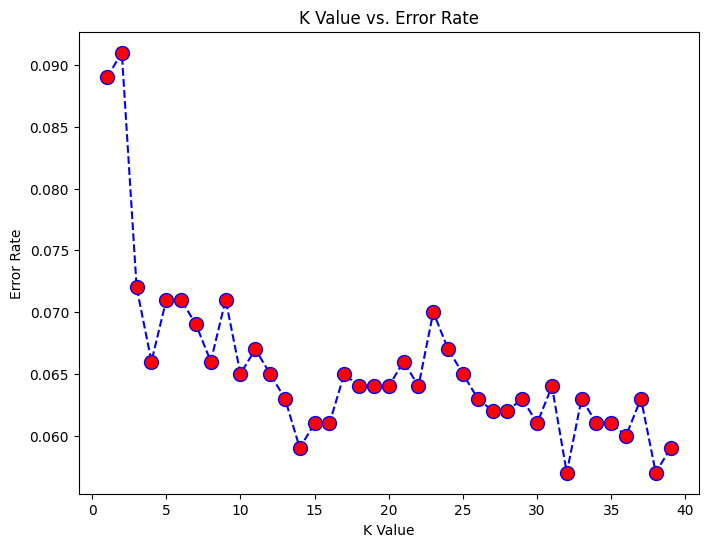

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, 40,), error_rate, linestyle = "dashed", color = "blue", marker = "o", markerfacecolor = "red", markersize = 10)
plt.title("K Value vs. Error Rate")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()

In [24]:
# by above graph we choose k = 32

KNN = KNeighborsClassifier(n_neighbors = 32)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=32)

In [25]:
y_predicted = KNN.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_predicted))

[[96  7]
 [ 2 95]]


In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       103
           1       0.93      0.98      0.95        97

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

